In [117]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,ExtraTreesClassifier,GradientBoostingClassifier,VotingClassifier
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris

In [4]:
temp_data = pd.DataFrame(load_iris()['data'],columns=['sepal_length_cm','sepal_width_cm','petal_length_cm','petal_width_cm'])
temp_target = pd.DataFrame(load_iris()['target'],columns=['target'])
data = pd.concat([temp_data,temp_target],axis=1)
data['target'] = data['target'].astype('category')
data.target = data.target.cat.rename_categories(['setosa','versicolor','virginica'])

In [ ]:
X = data.drop(['target'], axis=1)
y = data['target']
del data
# print(X.head())
print(X.shape)
# print(y.head())
print(y.shape)

In [63]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

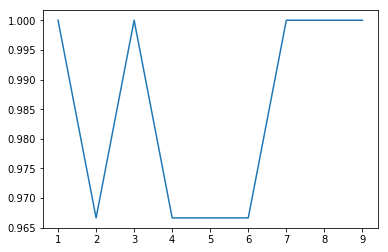

In [92]:
scores = []
for n_estimator in range(1,10):
    rf = RandomForestClassifier(n_estimators=n_estimator,min_samples_split=5,random_state=42,max_leaf_nodes=10)
    rf.fit(X_train,y_train)
    y_pred = rf.predict(X_test)
    scores.append(metrics.accuracy_score(y_test,y_pred))
plt.plot(range(1,10),scores)
plt.show()

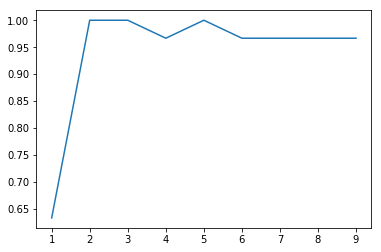

In [95]:
scores.clear()
for n_estimator in range(1,10):
    ada = AdaBoostClassifier(n_estimators=n_estimator,learning_rate=0.1,random_state=42)
    ada.fit(X_train,y_train)
    y_pred = ada.predict(X_test)
    scores.append(metrics.accuracy_score(y_pred=y_pred,y_true=y_test))
plt.plot(range(1,10),scores)
plt.show()

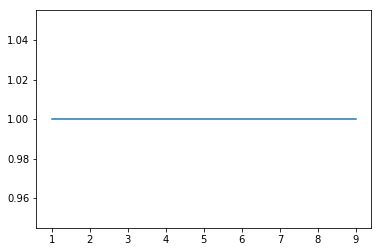

In [96]:
scores.clear()
for n_estimator in range(1,10):
    etc = ExtraTreesClassifier(n_estimators=n_estimator,min_samples_split=5,random_state=42,max_leaf_nodes=10)
    etc.fit(X_train,y_train)
    y_pred = etc.predict(X_test)
    scores.append(metrics.accuracy_score(y_pred=y_pred,y_true=y_test))
plt.plot(range(1,10),scores)
plt.show()

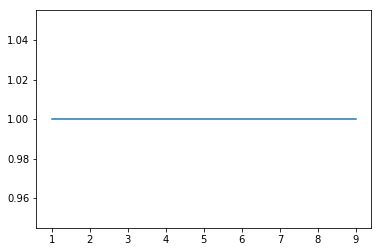

In [120]:
scores.clear()
for n_estimator in range(1,10):
    gbc = GradientBoostingClassifier(n_estimators=n_estimator,learning_rate=0.1,min_samples_split=5,random_state=42,max_leaf_nodes=10)
    gbc.fit(X_train,y_train)
    y_pred = gbc.predict(X_test)
    scores.append(metrics.accuracy_score(y_pred=y_pred,y_true=y_test))
plt.plot(range(1,10),scores)
plt.show()

In [110]:
gbc = GradientBoostingClassifier(n_estimators=5,learning_rate=0.1,min_samples_split=5,random_state=42,max_leaf_nodes=10)
ada = AdaBoostClassifier(n_estimators=5,learning_rate=0.1,random_state=42)    
rf = RandomForestClassifier(n_estimators=5,min_samples_split=5,random_state=42,max_leaf_nodes=10)
etc = ExtraTreesClassifier(n_estimators=5,min_samples_split=5,random_state=42,max_leaf_nodes=10)
vc = VotingClassifier(estimators=[('gbc',gbc),('ada',ada),('rf',rf),('etc',etc)])

In [111]:
vc.fit(X_train,y_train)

VotingClassifier(estimators=[('gbc', GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=10,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, m..._estimators=5, n_jobs=1,
           oob_score=False, random_state=42, verbose=0, warm_start=False))],
         flatten_transform=None, n_jobs=1, voting='hard', weights=None)

In [126]:
y_pred = vc.predict(X_test)
print(metrics.accuracy_score(y_true=y_test,y_pred=y_pred.data))

1.0


C:\Users\Altaireon\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
